In [1]:
#import libraries
import numpy as np 
import matplotlib.pyplot as plt

In [64]:
def equation(a1,a2,a3,b,x,y):
    '''
    returns the z value which allows us to graph our linear equations
    '''
    return -(a1*x + a2 * y - b) / a3

def check_ineq_3d(x,y,z,A,b):
    '''
    check the inequality constraints of a particular equation. If it fails a condition, return [0,0,0]
    '''
    for i in range(n): 
        left = A[i][0]*x + A[i][1]*y + A[i][2]*z
        left = round(left,3)
        if (left > b[i]):
            return [0,0,0]
    return [x,y,z]

def solver_3d(n,A,b):
    '''
    solver function which returns the points which are the vertex of our polyhedron with O(n^4) time complexity
    '''
    #test points is the intersection and sol is the points which satisfy all the constraints 
    test_points = [] 
    sol = []
    
    #dictionary which keeps track of our edges
    A_to_x = {}
    I = [] #unsorted 
    equations = [] #sorted  
    l = 0 #iterate
    
    for i in range(0,n):
        for j in range(0,n):
            for k in range(0,n):
                A0 = np.array([[A[i][0], A[i][1], A[i][2]], [A[j][0], A[j][1], A[j][2]], [A[k][0], A[k][1], A[k][2]]])
                B0 = np.array([b[i], b[j], b[k]])
                #throw exception if singular matrix error (linear equation is not solvable) 
                try: 
                    X = np.linalg.inv(A0).dot(B0) #solve the set of linear equation to obtain point. If not solvable, throw exception
                    test_points.append(X) 
                    point = check_ineq_3d(X[0],X[1],X[2],A,b)
                    if (point != [0,0,0]):
                        sol.append(point)  
                        #add a dictionary to keep track which points belongs to which index.
                        #organize the index afterwards and use the two to find which points to connect
                        I.append([i,j,k])
                        A_to_x[l] = [point]
                        l += 1
                except np.linalg.LinAlgError as err:
                    if 'Singular matrix' in str(err):
                        break
                    else: 
                        raise

    #check if points are on the same hyperplane as each other. If so, graph them 
    for i in range(len(I)):
        for j in range(i+1,len(I)):
            #temp variable 
            temp = 0 
            for k in range(0,3):
                for l in range(0,3):
                    if (I[i][k] == I[j][l]):
                        temp += 1
            if (temp >= 2):
                equations.append([i,j]) 
                    
    
    return sol,equations,A_to_x

def graph_points(result,index,hashmap):
    '''
    scatter plot of points that we obtained from solving our equation plus lines connecting it 
    '''
    
    #define our variables so it's easier to understand 
    X = result 
    I = index 
    A_to_X = hashmap 
    l_bound = -4
    h_bound = 4
    
    plt.figure(figsize = (8,8))
    ax = plt.axes(projection='3d')
    
    for i in range(0,len(X)): #plot scatter 
        ax.scatter(X[i][0], X[i][1], X[i][2], color = 'pink',s = 3)
    
    #plot the lines between our points 
    for i in range(0,len(I)):
        point1 = A_to_X[I[i][0]] #return one point we want to plot
        point2 = A_to_X[I[i][1]] #return the other point we want to plot 
        ax.plot((point1[0][0],point2[0][0]),(point1[0][1],point2[0][1]),(point1[0][2],point2[0][2]),c = 'blue',alpha=0.25)
    
    plt.title('Polyhedron in 3-d')
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_zlabel('z')
    ax.set_zlim3d(l_bound, h_bound)       
    ax.set_ylim3d(l_bound, h_bound)                   
    ax.set_xlim3d(l_bound, h_bound)
    ax.view_init(30,120)
    #ax.view_init(10,160)
    

vertex of the 3-d plot:  [[1.4297437663566006, 1.6819913316371804, -0.8361461325414261], [-0.9647092371516353, 1.0309834797764026, -0.7097611772482129], [1.4297437663566006, 1.6819913316371804, -0.8361461325414261], [2.633860404012824, 1.8899998452809363, -0.09968357403679962], [-0.16778940589333258, 0.8464265761642515, -2.0611431528203052], [5.077254803793844, -1.5007712854322963, -0.29443617006559764], [0.8344136564203559, -2.5955621275433134, 1.1822939523972353], [-0.2948271570470735, 0.3960899253205743, -2.328628897907342], [-1.6481443504516755, -0.48000394840519345, -1.231057586247796], [-0.4874246424987585, 0.7392538703860468, 2.0899368577252484], [-0.6796884133991778, -2.4251140975702383, 1.559684161414265], [-1.982866064882698, 0.6040970061638228, 0.3497494327232926], [-2.4697377065348407, -0.7976057700920246, -0.34904675169136956], [2.633860404012824, 1.8899998452809363, -0.09968357403679962], [5.077254803793844, -1.5007712854322963, -0.29443617006559764], [-0.4874246424987585

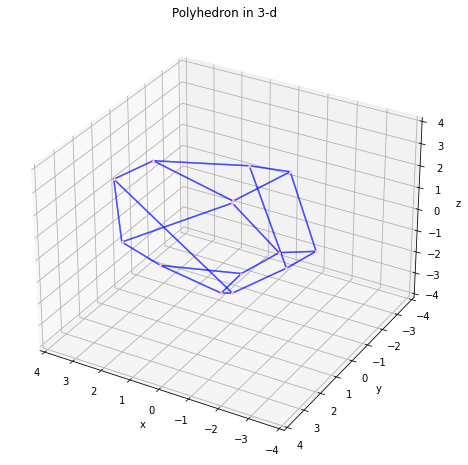

In [103]:

n = 10
d = 3
A = np.random.randn(n, d)
A /= np.sqrt(np.sum(A**2, axis=1)).reshape(-1, 1)
b = 1 + np.random.random(n)

#prevent any errors due to float-point arithmetic, can be replaced with tol  
for i in range(0,len(b)):
    b[i] = round(b[i],3)

result_3d,index_3d,hashmap_3d = solver_3d(n,A,b) #obtain the verticies of our shape, dictionary of the values in hashmap, and index of our points in index
graph_points(result_3d,index_3d,hashmap_3d) #graph our shape 

print("vertex of the 3-d plot: ", result_3d)